In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [18]:
df = pd.read_pickle('data/train_set.pkl')
df.head()

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9851,0.160,0.738,0.102
2007-01-02,12472,0.4395,0.117,0.775,0.109
2007-01-03,12474,-0.9995,0.192,0.748,0.060
2007-01-04,12480,-0.9973,0.113,0.827,0.060
2007-01-05,12398,0.9726,0.082,0.829,0.089


In [3]:
df.tail()

,prices,compound,neg,neu,pos
2016-12-27,19945,-0.9845,0.150,0.748,0.102
2016-12-28,19833,0.5733,0.113,0.783,0.104
2016-12-29,19819,-0.9866,0.144,0.758,0.099
2016-12-30,19819,-0.9961,0.165,0.742,0.093
2016-12-31,19819,0.8577,0.155,0.683,0.162


In [4]:
train_end = '2014-12-31'
test_start = '2015-01-01'
train_x = df.loc[:train_end]
test_x = df.loc[test_start:]
train_y = train_x.prices
test_y = test_x.prices
train_x = train_x.drop('prices', axis='columns')
test_x = test_x.drop('prices', axis='columns')

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
print(train_x.shape, test_x.shape)

(2921, 4) (730, 4)


In [7]:
pred = rf.predict(test_x)
pred_df = pd.DataFrame(data=pred, index=test_x.index, columns=['pred_prices'])
pred_df.head()

,pred_prices
2015-01-01,11964.94
2015-01-02,13529.01
2015-01-03,11534.99
2015-01-04,12446.20
2015-01-05,12303.85


In [8]:
r2_score(test_y, pred_df)

-38.241619594342474

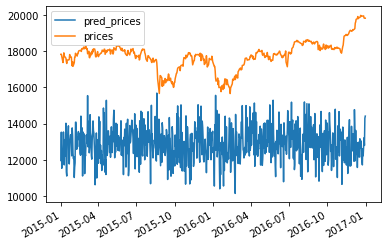

In [9]:
ax = pred_df.plot()
fig = pd.DataFrame(test_y).plot(ax=ax)

In [10]:
train_pred = rf.predict(train_x)
train_pred = pd.Series(train_pred, index=train_x.index)

In [11]:
len(train_x)

2921

In [12]:
days = 5
day_int = np.arange(days, len(train_x)-days, days)
day_int

array([   5,   10,   15,   20,   25,   30,   35,   40,   45,   50,   55,
         60,   65,   70,   75,   80,   85,   90,   95,  100,  105,  110,
        115,  120,  125,  130,  135,  140,  145,  150,  155,  160,  165,
        170,  175,  180,  185,  190,  195,  200,  205,  210,  215,  220,
        225,  230,  235,  240,  245,  250,  255,  260,  265,  270,  275,
        280,  285,  290,  295,  300,  305,  310,  315,  320,  325,  330,
        335,  340,  345,  350,  355,  360,  365,  370,  375,  380,  385,
        390,  395,  400,  405,  410,  415,  420,  425,  430,  435,  440,
        445,  450,  455,  460,  465,  470,  475,  480,  485,  490,  495,
        500,  505,  510,  515,  520,  525,  530,  535,  540,  545,  550,
        555,  560,  565,  570,  575,  580,  585,  590,  595,  600,  605,
        610,  615,  620,  625,  630,  635,  640,  645,  650,  655,  660,
        665,  670,  675,  680,  685,  690,  695,  700,  705,  710,  715,
        720,  725,  730,  735,  740,  745,  750,  7

In [13]:
days = 5
day_int = np.arange(days, len(train_x)-days, days)
total_days=0
mean_diff = 0
for day in day_int:
    act_mean = train_y[(day-days):day].mean()
    pred_mean = train_pred[day:(day+days)].mean()
    mean_diff += (pred_mean-act_mean)
    total_days += 1
mean_diff = mean_diff / total_days
mean_diff

5.238967009719884

In [14]:
pred_df['ewm_prices'] = pred_df.ewm(span=60).mean() + mean_diff
pred_df.head()

,pred_prices,ewm_prices
2015-01-01,11964.94,11970.178967
2015-01-02,13529.01,12765.247884
2015-01-03,11534.99,12343.222572
2015-01-04,12446.20,12371.644151
2015-01-05,12303.85,12358.285383


In [15]:
r2_score(test_y, pred_df.ewm_prices)

-36.956285074304915

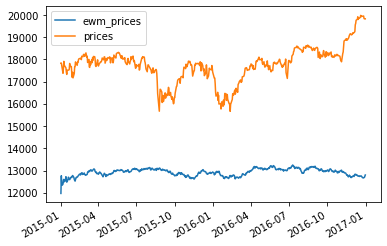

In [16]:
ax = pred_df[['ewm_prices']].plot()
fig = pd.DataFrame(test_y).plot(ax=ax)